### 1. Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import eli5
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from eli5.sklearn import PermutationImportance
%load_ext memory_profiler

### 2. Importing our dataset

In [2]:
df  = pd.read_csv("dataset_with_score.csv", index_col=0)

In [3]:
df.head()

,P2,P3,P4,P5,P6,P7,P8,P9,P10,F1,...,K3,K4,K5,K6,K7,K8,K9,K10,K11,TOTAL
id,,,,,,,,,,,,,,,,,,,,,
0,Urban,Female,22,Bengali,Graduate,"> 60,000",With friends. colleagues or students,Graduate,Postgraduate,passive,...,100 plus 3pct,"30,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,less than 110,not sure,7
1,Urban,Male,22,Bengali,Graduate,"< 20,000",With friends. colleagues or students,Graduate,Graduate,active,...,not sure,not sure,save it,cheaper model,buy beverage,Not sure,Not sure,not sure,not sure,3
2,Urban,Male,21,English,Graduate,"> 60,000","With children under the age of 18, With other ...",12th pass,12th pass,passive,...,not sure,not sure,save it,expensive model,keep it,Multiple businesses/investment,Not sure,not sure,not sure,6
3,Urban,Female,23,English,Graduate,"> 60,000",With other adult relatives,Postgraduate,Graduate,active,...,100 plus 3pct,"25,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,not sure,less than today,8
4,Rural,Male,21,Bengali,Graduate,"20,000 - 40,000",Alone,10th pass or less,Graduate,passive,...,100 plus 3pct,not sure,save it,cheaper model,keep it,Multiple businesses/investment,No interest,more than 110,same as today,10


#### Attribute for prediction

In [4]:
l = []
for i in df.index:
    if df.at[i, 'TOTAL'] > 7:
        l.append(1)
    else:
        l.append(0)
df['y'] = l
df.drop(['TOTAL'], axis = 1, inplace = True)
df.head()

,P2,P3,P4,P5,P6,P7,P8,P9,P10,F1,...,K3,K4,K5,K6,K7,K8,K9,K10,K11,y
id,,,,,,,,,,,,,,,,,,,,,
0,Urban,Female,22,Bengali,Graduate,"> 60,000",With friends. colleagues or students,Graduate,Postgraduate,passive,...,100 plus 3pct,"30,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,less than 110,not sure,0
1,Urban,Male,22,Bengali,Graduate,"< 20,000",With friends. colleagues or students,Graduate,Graduate,active,...,not sure,not sure,save it,cheaper model,buy beverage,Not sure,Not sure,not sure,not sure,0
2,Urban,Male,21,English,Graduate,"> 60,000","With children under the age of 18, With other ...",12th pass,12th pass,passive,...,not sure,not sure,save it,expensive model,keep it,Multiple businesses/investment,Not sure,not sure,not sure,0
3,Urban,Female,23,English,Graduate,"> 60,000",With other adult relatives,Postgraduate,Graduate,active,...,100 plus 3pct,"25,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,not sure,less than today,1
4,Rural,Male,21,Bengali,Graduate,"20,000 - 40,000",Alone,10th pass or less,Graduate,passive,...,100 plus 3pct,not sure,save it,cheaper model,keep it,Multiple businesses/investment,No interest,more than 110,same as today,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P2      203 non-null    object
 1   P3      203 non-null    object
 2   P4      203 non-null    int64 
 3   P5      203 non-null    object
 4   P6      203 non-null    object
 5   P7      203 non-null    object
 6   P8      203 non-null    object
 7   P9      203 non-null    object
 8   P10     203 non-null    object
 9   F1      203 non-null    object
 10  F2      203 non-null    object
 11  F3      203 non-null    object
 12  F4      203 non-null    object
 13  F5      203 non-null    object
 14  F6      203 non-null    object
 15  F7      173 non-null    object
 16  S1      203 non-null    object
 17  A1      203 non-null    object
 18  A2      203 non-null    object
 19  K1      203 non-null    object
 20  K2      203 non-null    object
 21  K3      203 non-null    object
 22  K4      203 non-null    ob

In [6]:
df.describe()

,P4,y
count,203.000000,203.000000
mean,21.561576,0.684729
std,2.883875,0.465772
min,18.000000,0.000000
25%,20.000000,0.000000
50%,21.000000,1.000000
75%,22.000000,1.000000
max,35.000000,1.000000


### 3. Visualization

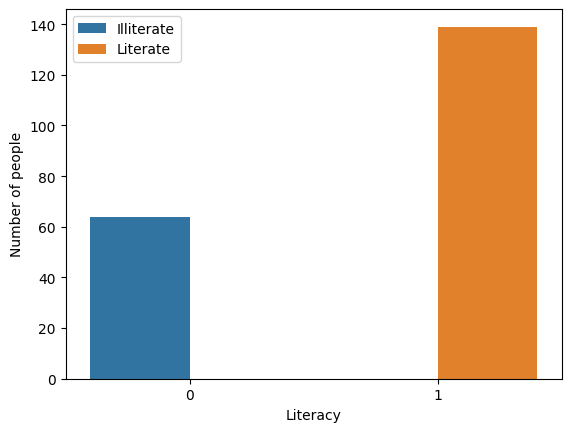

In [7]:
sns.countplot(x = df.y, hue = df.y)
plt.xlabel("Literacy")
plt.ylabel("Number of people")
plt.legend(["Illiterate", "Literate"])
plt.show()

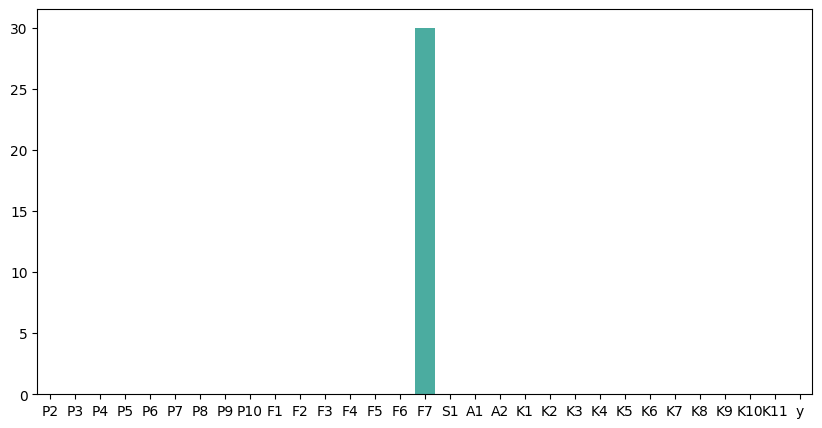

In [8]:
# number of unknowns
plt.figure(figsize=(10,5))
sns.barplot(x = df.columns, y = df.isna().sum())
plt.show()

#### So only F7 has null values, let's inspect further

In [9]:
set(df.F7)

{'< 1 week',
 '>= 1 month but < 3 months',
 '>= 3 months bu < 6 month',
 '>= 6 months',
 'dont know',
 nan}

- Replacing the null values with the maximum count label

In [10]:
df.F7.replace([np.nan], df.F7.value_counts().index[0], inplace=True)
df.head()

,P2,P3,P4,P5,P6,P7,P8,P9,P10,F1,...,K3,K4,K5,K6,K7,K8,K9,K10,K11,y
id,,,,,,,,,,,,,,,,,,,,,
0,Urban,Female,22,Bengali,Graduate,"> 60,000",With friends. colleagues or students,Graduate,Postgraduate,passive,...,100 plus 3pct,"30,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,less than 110,not sure,0
1,Urban,Male,22,Bengali,Graduate,"< 20,000",With friends. colleagues or students,Graduate,Graduate,active,...,not sure,not sure,save it,cheaper model,buy beverage,Not sure,Not sure,not sure,not sure,0
2,Urban,Male,21,English,Graduate,"> 60,000","With children under the age of 18, With other ...",12th pass,12th pass,passive,...,not sure,not sure,save it,expensive model,keep it,Multiple businesses/investment,Not sure,not sure,not sure,0
3,Urban,Female,23,English,Graduate,"> 60,000",With other adult relatives,Postgraduate,Graduate,active,...,100 plus 3pct,"25,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,not sure,less than today,1
4,Rural,Male,21,Bengali,Graduate,"20,000 - 40,000",Alone,10th pass or less,Graduate,passive,...,100 plus 3pct,not sure,save it,cheaper model,keep it,Multiple businesses/investment,No interest,more than 110,same as today,1


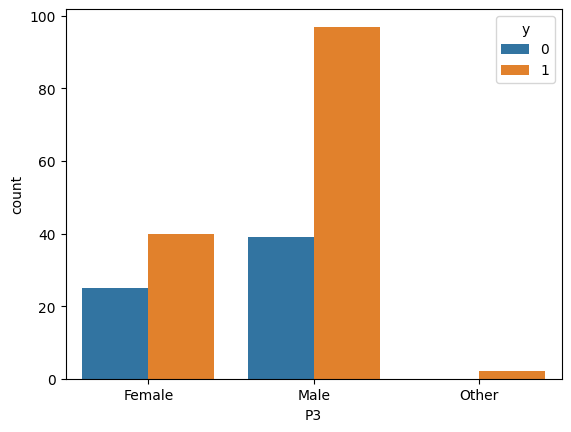

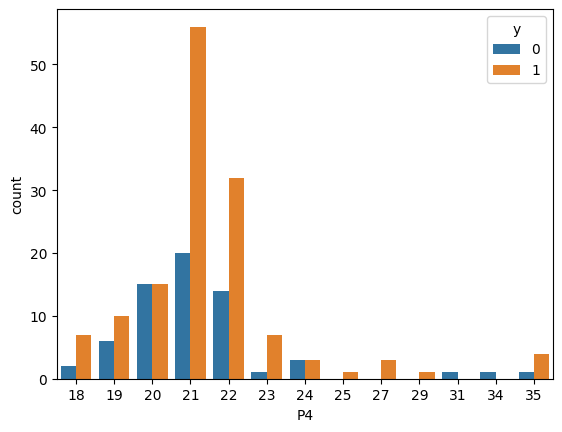

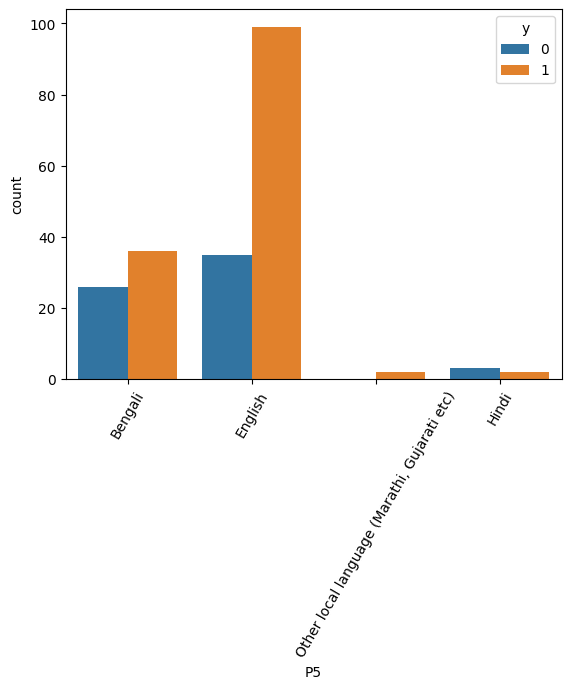

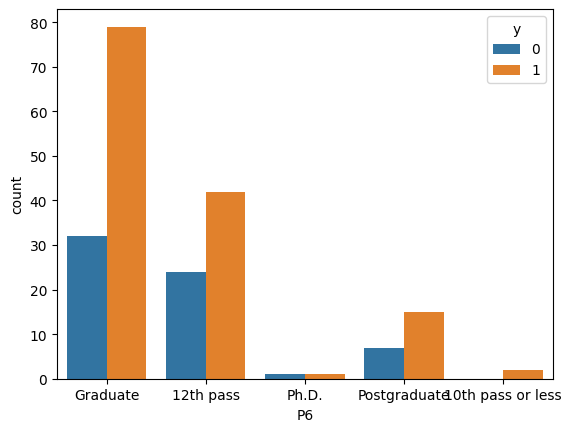

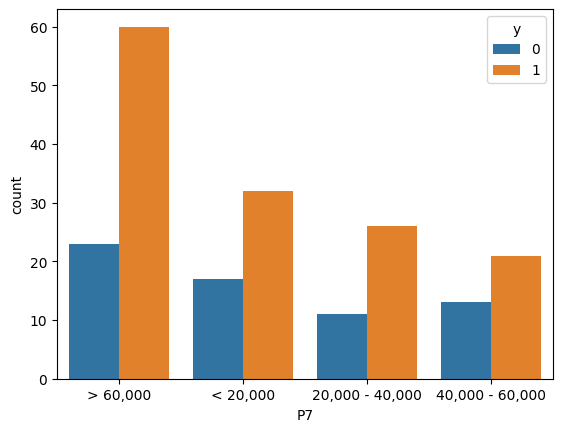

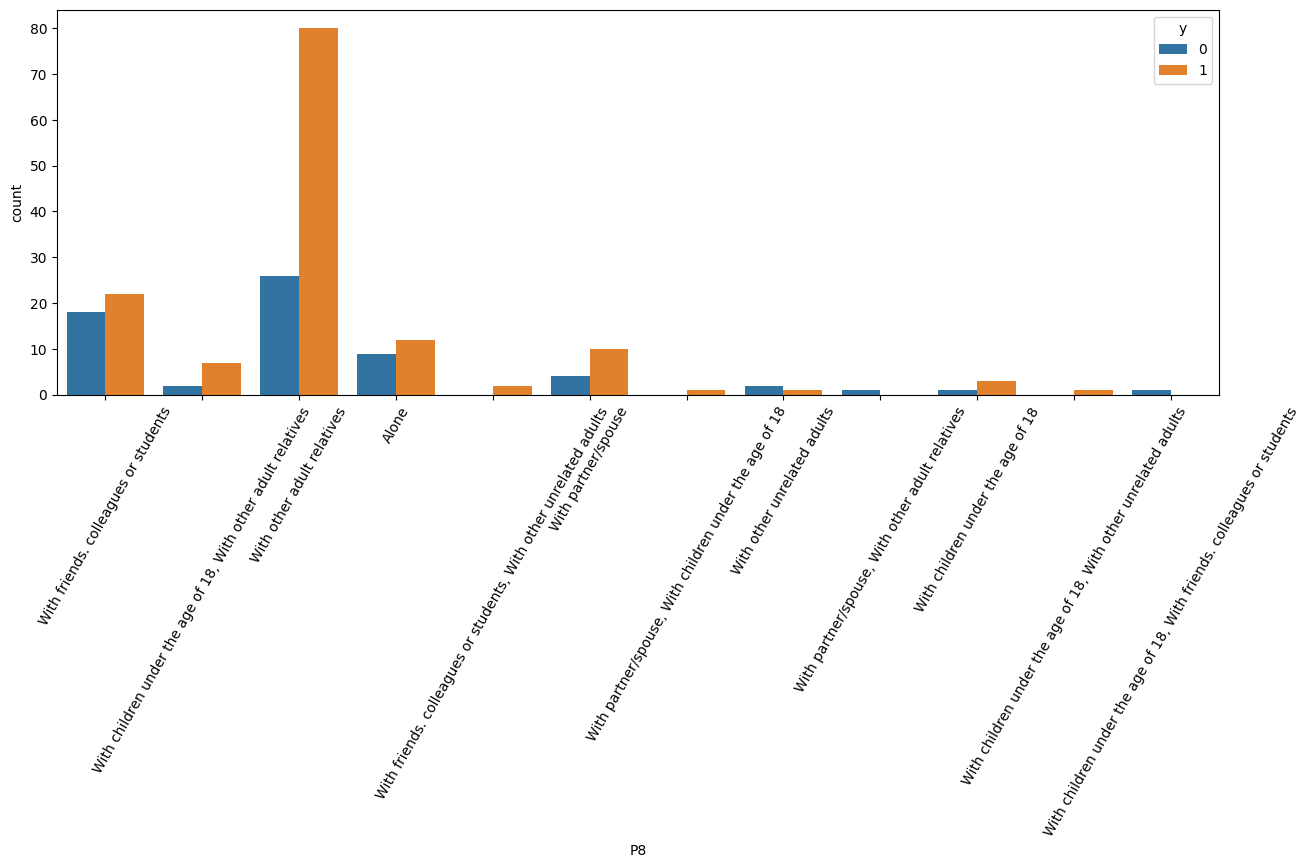

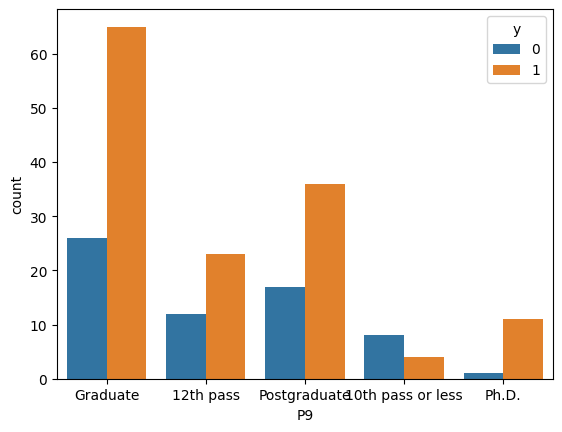

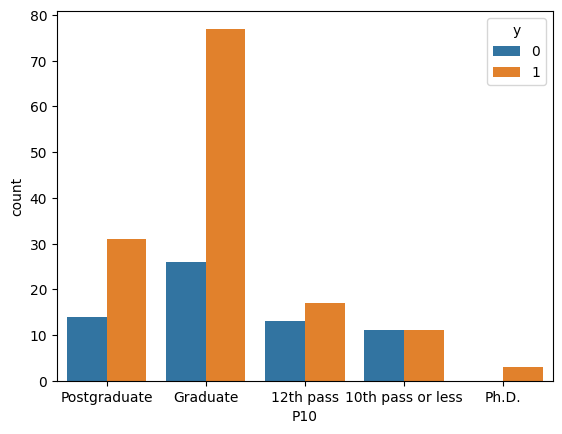

In [11]:
sns.countplot(x = df.P3, hue = df.y)
plt.show()
sns.countplot(x = df.P4, hue = df.y)
plt.show()
sns.countplot(x = df.P5, hue = df.y)
plt.xticks(rotation = 60)
plt.show()
sns.countplot(x = df.P6, hue = df.y)
plt.show()
sns.countplot(x = df.P7, hue = df.y)
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(x = df.P8, hue = df.y)
plt.xticks(rotation = 60)
plt.show()
sns.countplot(x = df.P9, hue = df.y)
plt.show()
sns.countplot(x = df.P10, hue = df.y)
plt.show()

##### All these attributes have little to no effect on the end result, as they are quite equally distributed among all the labels. So we can drop them

In [12]:
df.drop(["P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10"], axis = 1, inplace = True)
df.head()

,P2,F1,F2,F3,F4,F5,F6,F7,S1,A1,...,K3,K4,K5,K6,K7,K8,K9,K10,K11,y
id,,,,,,,,,,,,,,,,,,,,,
0,Urban,passive,passive,no record,Putting money in a savings/deposits account,no income,invest in assets,dont know,Check the balance and transactions of my bank ...,Debit card,...,100 plus 3pct,"30,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,less than 110,not sure,0
1,Urban,active,passive,spreadsheet or same,Giving money to family to save on your behalf,no income,keep in bank account,>= 6 months,Check the balance and transactions of my bank ...,Debit card,...,not sure,not sure,save it,cheaper model,buy beverage,Not sure,Not sure,not sure,not sure,0
2,Urban,passive,passive,notes,"Saving cash at home, Putting money in a saving...",10% - 50%,keep in bank account,>= 6 months,Check the balance and transactions of my bank ...,Debit card,...,not sure,not sure,save it,expensive model,keep it,Multiple businesses/investment,Not sure,not sure,not sure,0
3,Urban,active,passive,spreadsheet or same,Putting money in a savings/deposits account,no income,keep in bank account,dont know,Check the balance and transactions of my bank ...,Debit card,...,100 plus 3pct,"25,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,not sure,less than today,1
4,Rural,passive,active,spreadsheet or same,Putting money in a savings/deposits account,10% - 50%,keep in bank account,>= 1 month but < 3 months,Check the balance and transactions of my bank ...,Debit card,...,100 plus 3pct,not sure,save it,cheaper model,keep it,Multiple businesses/investment,No interest,more than 110,same as today,1


##### Since attributes S1, A1 and A2 are preference based, we can drop them too

In [13]:
df.drop(['S1', 'A1', 'A2'], axis = 1, inplace = True)
df.head()

,P2,F1,F2,F3,F4,F5,F6,F7,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,y
id,,,,,,,,,,,,,,,,,,,,
0,Urban,passive,passive,no record,Putting money in a savings/deposits account,no income,invest in assets,dont know,"Jewellery, Car, House, Art works",2 lakh,100 plus 3pct,"30,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,less than 110,not sure,0
1,Urban,active,passive,spreadsheet or same,Giving money to family to save on your behalf,no income,keep in bank account,>= 6 months,"Jewellery, House, Art works, Child support",not sure,not sure,not sure,save it,cheaper model,buy beverage,Not sure,Not sure,not sure,not sure,0
2,Urban,passive,passive,notes,"Saving cash at home, Putting money in a saving...",10% - 50%,keep in bank account,>= 6 months,"Car, House, Art works",not sure,not sure,not sure,save it,expensive model,keep it,Multiple businesses/investment,Not sure,not sure,not sure,0
3,Urban,active,passive,spreadsheet or same,Putting money in a savings/deposits account,no income,keep in bank account,dont know,"Jewellery, House",< 2 lakh,100 plus 3pct,"25,000",save it,cheaper model,buy beverage,Multiple businesses/investment,No interest,not sure,less than today,1
4,Rural,passive,active,spreadsheet or same,Putting money in a savings/deposits account,10% - 50%,keep in bank account,>= 1 month but < 3 months,"Jewellery, Car, House, Art works",< 2 lakh,100 plus 3pct,not sure,save it,cheaper model,keep it,Multiple businesses/investment,No interest,more than 110,same as today,1


### 4. Encoding the categorical attributes

- One Hot Encoding

In [14]:
df = df.join(pd.get_dummies(df.loc[:, ('P2', 'F1', 'F2', 'F3', 'F4', 'F6', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11')]))
df.drop(['P2', 'F1', 'F2', 'F3', 'F4', 'F6', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11'], axis = 1, inplace=True)

- Label Encoding

In [15]:
l = ['F5', 'F7']
for _ in l:
    df.loc[:, _] = LabelEncoder().fit_transform(df.loc[:, _])
df.head()

/var/folders/r9/gv25zd3n48lcc7_tk4cthcf40000gn/T/ipykernel_7153/4235996627.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, _] = LabelEncoder().fit_transform(df.loc[:, _])


,F5,F7,y,P2_Rural,P2_Urban,F1_active,F1_passive,F2_active,F2_passive,F3_no record,...,K9_No interest,K9_Not sure,K10_exactly 110,K10_less than 110,K10_more than 110,K10_not sure,K11_less than today,K11_more than today,K11_not sure,K11_same as today
id,,,,,,,,,,,,,,,,,,,,,
0,4,4,0,0,1,0,1,0,1,1,...,1,0,0,1,0,0,0,0,1,0
1,4,3,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,3,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,4,4,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
4,0,1,1,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1


### 5. Creating Train & Test Datasets

In [16]:
X, y = df.drop(['y'], axis = 1), df.y

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

### 6. Training Various Models

##### Ensemble Model - Bagging Classifier for Decision Tree

In [19]:
max = (0, 0, 0)
for _ in tqdm(range(1,20)):
    for __ in [10, 20, 40, 50, 80, 100]:
        dt = BaggingClassifier(DecisionTreeClassifier(max_depth= _, random_state=1), n_estimators=__, random_state=1)
        dt.fit(train_X, train_y)
        predict_dt = dt.predict(val_X)
        a = accuracy_score(predict_dt, val_y)
        if max[2] < a:
            max = (_, __, a)
max

100%|██████████| 19/19 [00:07<00:00,  2.60it/s]


(5, 20, 0.8780487804878049)

In [20]:
dt = BaggingClassifier(DecisionTreeClassifier(max_depth= 5, random_state=1), n_estimators=20, random_state=1)
dt.fit(train_X, train_y)
pred_test_y = dt.predict(test_X)
accuracy_score(pred_test_y, test_y)

0.8536585365853658

- With maximum depth 5 and 20 bags we get 85.36% accuracy on the test data

#### Gaussian Naive Bayes

In [21]:
max = (0, 0)
for _ in tqdm(range(1,20)):
    gnb = GaussianNB(var_smoothing = 10**-_)
    gnb.fit(train_X, train_y)
    pred_gnb = gnb.predict(val_X)
    __ = accuracy_score(pred_gnb, val_y)
    if __ > max[1]:
        max = (_, __)
max

100%|██████████| 19/19 [00:00<00:00, 336.67it/s]


(1, 0.8536585365853658)

In [22]:
gnb = GaussianNB(var_smoothing = 10**-1)
gnb.fit(train_X, train_y)
pred_gnb = gnb.predict(test_X)
accuracy_score(pred_gnb, test_y)

0.8780487804878049

- Gaussian Naive Bayes is giving 87.8% accuracy on the test data

#### Logistic Regression

In [23]:
max = (0, 0, 0)
for m in tqdm([100, 200, 500, 1000]):
    for c in np.logspace(0, 4, 20):
        lr = LogisticRegression(penalty="l2", random_state=1, max_iter = m, C = c)
        pred_lr = lr.fit(train_X, train_y).predict(val_X)
        _ = accuracy_score(pred_lr, val_y)
        if _ > max[2]:
            max = (m, c, _)
max

100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


(100, 2.636650898730358, 0.926829268292683)

In [24]:
lr = LogisticRegression(penalty="l2", random_state=1, max_iter = 100, C = 2.636650898730358)
pred_lr = lr.fit(train_X, train_y).predict(test_X)
accuracy_score(pred_lr, test_y)

0.926829268292683

- Using logistic regression we're getting 92.68% accuracy on the test data

#### Ensemble Model - Random Forest Classifier

In [25]:
max = (0, 0)
for _ in [10, 20, 40, 50, 80, 100]:
    rf = RandomForestClassifier(n_estimators=_, random_state=1)
    rf.fit(train_X, train_y)
    pred_rf = rf.predict(val_X)
    __ = accuracy_score(pred_rf, val_y)
    if __ > max[1]:
        max = (_, __)
max

(20, 0.9024390243902439)

In [26]:
rf = RandomForestClassifier(n_estimators=_, random_state=1)
rf.fit(train_X, train_y)
pred_rf = rf.predict(test_X)
accuracy_score(pred_rf, test_y)

0.9024390243902439

- Using random forest with 20 bags, we're gettng 90.24% accuracy on the test data

#### Let's do voting among our models to get the best one

In [27]:
start_time = time.perf_counter()

In [28]:
final_model = VotingClassifier([("dt",dt), ("gnb",gnb), ("lr",lr), ("rf", rf)], voting = "hard")
final_model.fit(train_X, train_y)
final_pred = final_model.predict(test_X)
accuracy_score(final_pred, test_y)

0.9512195121951219

In [29]:
print("Elasped time in seconds", time.perf_counter() - start_time)

Elasped time in seconds 0.3205224580000028


In [30]:
%memit VotingClassifier([("dt",dt), ("gnb",gnb), ("lr",lr), ("rf", rf)], voting = "hard").fit(train_X, train_y)

peak memory: 437.86 MiB, increment: 0.02 MiB


#### So with the above model we're getting around 95.12% accuracy on our test data

### 7. Feature Importance

In [31]:
pi = PermutationImportance(final_model, random_state=1).fit(test_X, test_y)
eli5.show_weights(pi, feature_names = test_X.columns.to_list())

Weight,Feature
0.0683 ± 0.0195,K11_not sure
0.0537 ± 0.0365,F4_Saving cash at home
0.0488 ± 0.0534,K11_less than today
0.0488 ± 0.0000,K10_not sure
0.0341 ± 0.0239,K10_more than 110
0.0293 ± 0.0569,K2_2 lakh
0.0244 ± 0.0000,K2_not sure
0.0244 ± 0.0000,K9_No interest
0.0195 ± 0.0365,K4_not sure
0.0195 ± 0.0365,F5


### 8. Quality measure of the model

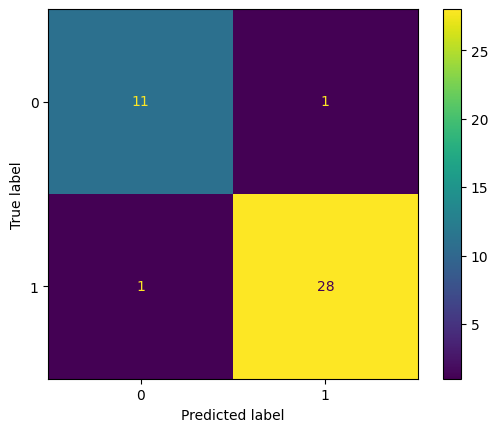

In [32]:
cm = classification_report(test_y, final_pred)
ConfusionMatrixDisplay.from_estimator(final_model, test_X, test_y)
plt.show()

In [33]:
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.94      0.94      0.94        41
weighted avg       0.95      0.95      0.95        41



#### Our model scores over 95% for all precision, recall, f1-score and accuracy metrics
### Having more data to train our model, would surely have increased them further